In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [29]:
df = pd.read_csv('house_prices.csv')
df.head(4)

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675


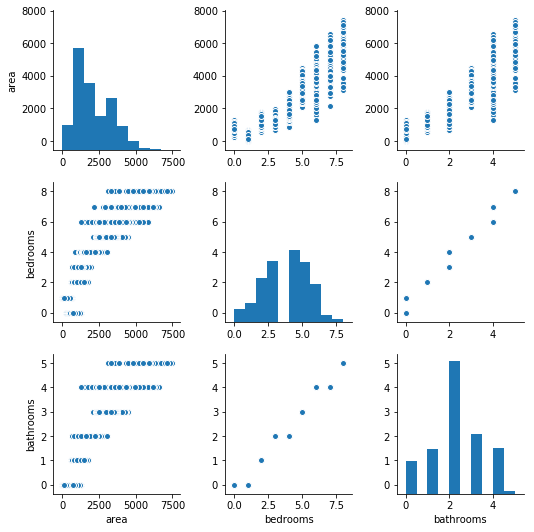

In [19]:
sb.pairplot(df[['area', 'bedrooms','bathrooms']])

In [30]:
df['intercept'] = 1 
lm = sm.OLS(df['price'], df[['intercept','area','bedrooms','bathrooms' ]])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Mon, 15 Jan 2018   Prob (F-statistic):               0.00
Time:                        11:13:26   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

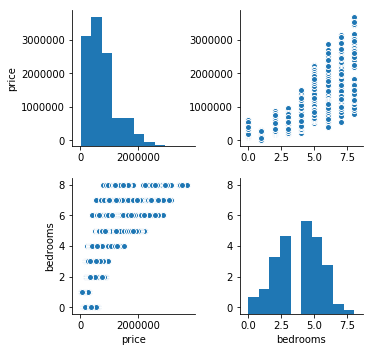

In [31]:
sns.pairplot(df[['price', 'bedrooms']])

In [33]:
# get y and X dataframes based on this regression:
y, X = dmatrices('price ~ bedrooms + bathrooms + area' , df, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [34]:
df.head(3)

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept
0,1112,B,1188,3,2,ranch,598291,1
1,491,B,3512,5,3,victorian,1744259,1
2,5952,B,1134,3,2,ranch,571669,1


In [35]:
df1 = df.drop('bathrooms', axis=1) # remove bathrooms
df1.head(3)

,house_id,neighborhood,area,bedrooms,style,price,intercept
0,1112,B,1188,3,ranch,598291,1
1,491,B,3512,5,victorian,1744259,1
2,5952,B,1134,3,ranch,571669,1


sns.pairplot(df1[['bedrooms','area']])

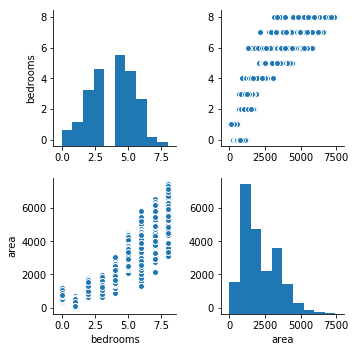

In [36]:
sns.pairplot(df1[['bedrooms','area']])

In [37]:
df1['intercept'] = 1
lm1 = sm.OLS(df1['price'],df1[['intercept', 'bedrooms', 'area']])
results1 = lm1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     6345.
Date:                Mon, 15 Jan 2018   Prob (F-statistic):               0.00
Time:                        11:14:23   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6025   BIC:                         1.691e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7857.4509   9425.288      0.834      0.405   -1.06e+04    2.63e+04
bedrooms    1626.8306   5191.702      0.313      0.754   -8550.763    1.18e+04
area         346.4458      7.152     48.443      0.000     332.426     360.466
==============================================================================
Omnibus:                      368.146   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.224
Skew:                           0.535   Prob(JB):                     8.91e-77
Kurtosis:                       2.502   Cond. No.                     6.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# get y and X dataframes based on this regression:
y1, X1 = dmatrices('price ~ bedrooms + area' , df1, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif1["features"] = X1.columns

In [39]:
vif1

,VIF Factor,features
0,6.063895,Intercept
1,5.345400,bedrooms
2,5.345400,area
